In [1]:
from memoLib.dataset import DataSet
data_dir       = "/media/ansary/DriveData/Work/bengalAI/datasets/CraftData/source"
ds=DataSet(data_dir)
ds.common.symbols.df

#LOG     :All paths found


  0%|          | 0/200840 [00:00<?, ?it/s]

  0%|          | 0/72045 [00:00<?, ?it/s]

#LOG     :Processing Dictionary:/media/ansary/DriveData/Work/bengalAI/datasets/CraftData/source/bangla/dictionary.csv


  0%|          | 0/1059977 [00:00<?, ?it/s]

  0%|          | 0/46101 [00:00<?, ?it/s]

  0%|          | 0/10305 [00:00<?, ?it/s]

#LOG     :converting int labels to string


  0%|          | 0/10305 [00:00<?, ?it/s]

#LOG     :Processing Dictionary:/media/ansary/DriveData/Work/bengalAI/datasets/CraftData/source/english/dictionary.csv


  0%|          | 0/370098 [00:00<?, ?it/s]

  0%|          | 0/5975 [00:00<?, ?it/s]

#LOG     :bangla.graphemes


  0%|          | 0/200840 [00:00<?, ?it/s]

#LOG     :bangla.numbers


  0%|          | 0/72045 [00:00<?, ?it/s]

#LOG     :english.graphemes


  0%|          | 0/46101 [00:00<?, ?it/s]

#LOG     :english.numbers


  0%|          | 0/10305 [00:00<?, ?it/s]

#LOG     :common.symbols


  0%|          | 0/5975 [00:00<?, ?it/s]

#LOG     :bangla.fonts


  0%|          | 0/21 [00:00<?, ?it/s]

#LOG     :english.fonts


  0%|          | 0/2682 [00:00<?, ?it/s]

#LOG     :common.background


  0%|          | 0/982 [00:00<?, ?it/s]

#LOG     :common.noise.random


  0%|          | 0/112763 [00:00<?, ?it/s]

#LOG     :common.noise.sign


  0%|          | 0/3240 [00:00<?, ?it/s]

,filename,label,img_path
0,symbol_0,>,/media/ansary/DriveData/Work/bengalAI/datasets...
1,symbol_1,>,/media/ansary/DriveData/Work/bengalAI/datasets...
2,symbol_2,>,/media/ansary/DriveData/Work/bengalAI/datasets...
3,symbol_3,>,/media/ansary/DriveData/Work/bengalAI/datasets...
4,symbol_4,>,/media/ansary/DriveData/Work/bengalAI/datasets...
...,...,...,...
5970,symbol_5970,<,/media/ansary/DriveData/Work/bengalAI/datasets...
5971,symbol_5971,<,/media/ansary/DriveData/Work/bengalAI/datasets...
5972,symbol_5972,<,/media/ansary/DriveData/Work/bengalAI/datasets...
5973,symbol_5973,<,/media/ansary/DriveData/Work/bengalAI/datasets...


In [6]:
import numpy as np 
from memoLib.word import createPrintedLine, processLine
from memoLib.config import config
from memoLib.utils import padImg
import matplotlib.pyplot as plt
import random
import os
from glob import glob

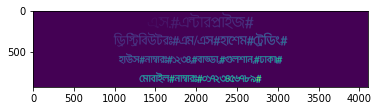

In [20]:

head_names=[
               "এ.স. এন্টারপ্রাইজ",
               "ড্রিস্ট্রিবিউটরঃ এম/এস হাশেম ট্রেডিং",
               "হাউস নাম্বারঃ ১২৩৪, বাড্ডা, গুলশান, ঢাকা।",    
               "মোবাইল নাম্বারঃ ০১৭২৩৪৫৬৭৮৯",
               "নাম্বারঃ",
               "তারিখঃ"
               ] 

head_var_names=[
                
               "আউটলেটের নামঃ",
               "রাউটঃ",
               "ঠিকানাঃ"
                
                ]
### Add space and dot with last two value of head_names list
head_names[len(head_names)-1] = head_names[len(head_names)-1]+config.date_no.rep*config.ext ## Date
head_names[len(head_names)-2] = head_names[len(head_names)-2]+config.date_no.rep*config.ext # No.

## Add dot head_var_names list
for i, p in enumerate(head_var_names):
    dot_len = config.date_no.space-len(p)
    head_var_names[i] = head_var_names[i]+dot_len*config.ext

# len_head_names = len(head_names)
# len_head_var_names = len(head_var_names)

## merge both list (head_names, head_var_names)
data_Text = head_names + head_var_names
data = [processLine(line) for line in data_Text]


# stable-fixed
iden=3

imgs=[]
labels=[]

h_max,w_max=0,0

fonts=[_font for _font in  glob(os.path.join( ds.bangla.fonts,"*.ttf")) if "ANSI" not in _font]
font_path=random.choice(fonts)
# find images and labels
i = 0
for line in data: 
    i += 1
    if i==1:
        img,label,iden=createPrintedLine(iden,line,font_path,config.headline1_font_size)
    elif i==2:
        img,label,iden=createPrintedLine(iden,line,font_path,config.headline2_font_size)
    else:
        img,label,iden=createPrintedLine(iden,line,font_path,config.headline3_font_size)
    
    
    # print(iden)
    h,w=img.shape
    if h>h_max:
        h_max=h
    if w>w_max:
        w_max=w

    imgs.append(img)
    labels.append(label)

# padding
    #######################################
h_max+=config.line_pad
w_max+=config.line_pad
padded=[]
for img in imgs:
   img=padImg(img, h_max, w_max)
   padded.append(img)

## Merge Padded Images without last 2 values
img_1=np.concatenate(padded[:len(head_names)-2],axis=0)


plt.imshow(img_1)
plt.show()

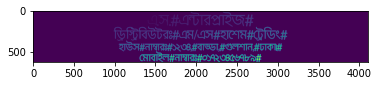

In [22]:
img_1=img_1[~np.all(img_1 == 0, axis=1)]

plt.imshow(img_1)
plt.show()

In [ ]:
### Call Function: memoHeadFunc()

head_names=[
               "এ.স. এন্টারপ্রাইজ",
               "ড্রিস্ট্রিবিউটরঃ এম/এস হাশেম ট্রেডিং",
               "হাউস নাম্বারঃ ১২৩৪, বাড্ডা, গুলশান, ঢাকা।",    
               "মোবাইল নাম্বারঃ ০১৭২৩৪৫৬৭৮৯",
               "নাম্বারঃ",
               "তারিখঃ"
               ] 

head_var_names=[
                
               "আউটলেটের নামঃ",
               "রাউটঃ",
               "ঠিকানাঃ"
                
                ]

class_map_csv='/home/apsisdev/ansary/synthdata/__notes__/class_map.csv'
font_path='/home/apsisdev/ansary/synthdata/__notes__/Bangla.ttf'

final_image, _lst, _lst_dn=memoHeadFunc(
                                          head_names,
                                          head_var_names,
                                          class_map_csv_path=class_map_csv,
                                          font_path=font_path)

# __final_image = final_image
# ### Clean View
# __final_image[__final_image>0]=255
# plt.imshow(__final_image)
# plt.show()

In [17]:
def createPrintedLine(iden,comps,
                      font_path,
                      font_size):
    '''
        creates printed word image
        args:
            iden    :       identifier marking value starting
            linecomps   :       the list of components
            font_path:      the desired font path 
            font_size:      the size of the font
            
        returns:
            img     :       marked word image
            label   :       dictionary of label {iden:label}
            iden    :       the final identifier
    '''
    label={}
    font=PIL.ImageFont.truetype(font_path, size=font_size)
    
    # max dim
    min_offset=100
    
    comps=[comp for comp in comps if comp is not None]
    # FIND # 
    if config.ext in comps:
        _exts=comps[comps.index(config.ext):]
        comps=comps[:comps.index(config.ext)]  
    else:
        _exts=None

      
    
    max_dim=len(comps)*font_size+min_offset
    
    # reconfigure comps
    mods=['ঁ', 'ং', 'ঃ']
    for idx,comp in enumerate(comps):
        if idx < len(comps)-1 and comps[idx+1] in mods:
            comps[idx]+=comps[idx+1]
            comps[idx+1]=None 
            
    comps=[comp for comp in comps if comp is not None]
    # construct labels
    
    imgs=[]
    comp_str=''
    
    for comp in comps:
        if comp==" ":
            comp_str+=config.ext

            
        comp_str+=comp    
        # draw
        image = PIL.Image.new(mode='L', size=(max_dim,max_dim))
        draw = PIL.ImageDraw.Draw(image)
        draw.text(xy=(0, 0), text=comp_str, fill=1, font=font)
        
        imgs.append(np.array(image))
        if comp==" ":
            comp="space"
        # label
        label[iden] = comp 
        iden+=1
        
        
    # add images
    img=sum(imgs)
    img=stripPads(img,0)
    # offset
    vals=list(np.unique(img))
    vals=sorted(vals,reverse=True)
    vals=vals[:-1]
    # set values
    _img=np.zeros(img.shape)
    for v,l in zip(vals,label.keys()):
        _img[img==v]=l
    # resize
    h,w=_img.shape 
    width= int(font_size* w/h) 
    img=cv2.resize(_img,(width,font_size),fx=0,fy=0, interpolation = cv2.INTER_NEAREST)
    

    # handle extensions
    if _exts is not None:
        img=handleExtensions(img,len(_exts),iden,font,font_size)
        # label
        label[iden] = "ext"
        iden+=1
    return img,label,iden


def handleExtensions(img,len_ext,iden,font,ext_size):
    '''
        creates/ adds extensions to lines
        arg:
            img     : final staged marked image
            len_ext : length of extension
            iden    : marking end value 
            font    : the image font
            ext_size: proper size of the extensions
    '''
    ext_sym=random.choice(config.date_no.exts)
    # draw
    image = PIL.Image.new(mode='L', size=font.getsize(ext_sym))
    draw = PIL.ImageDraw.Draw(image)
    draw.text(xy=(0, 0), text=ext_sym, fill=iden, font=font)
    
    ext_img=[np.array(image) for _ in range(len_ext)]
    ext_img=np.concatenate(ext_img,axis=1)
    # reshape
    H,W=img.shape

    h,w=ext_img.shape
    width= int(H* w/h) 
    ext_img=cv2.resize(ext_img,(width,H),fx=0,fy=0, interpolation = cv2.INTER_NEAREST)
    
    return np.concatenate([img,ext_img],axis=1) 

In [ ]:
_lst

In [ ]:
_lst_dn

In [ ]:
np.unique(final_image)

In [ ]:
# Updated_others_locs=[555,555]

for i,img in zip(_lst,imgss):
        idx = np.where(final_image==i)
        h,w=img.shape
        print("hand image: ", h,w)
        
        y_min, y_max, x_min, x_max = np.min(idx[0]), np.max(idx[0]), np.min(idx[1]), np.max(idx[1])
        print(y_min, y_max, x_min, x_max)
        
        ## resize image
        h_max = abs(y_max-y_min)
        w_max = abs(x_max-x_min)
        print(h_max, w_max)
        
        if w<x_min: 
            y_min, y_max, x_min, x_max=y_min, y_max, x_min-w, x_max
        else:
            y_min, y_max, x_min, x_max=y_min, y_max, x_min-w//2, x_max
            
        h_max = abs(y_max-y_min)
        w_max = abs(x_max-x_min)
        print(h_max, w_max)
        
        dim=(h_max,w_max)
        _img = cv2.resize(img, dim[::-1], fx=0,fy=0, interpolation = cv2.INTER_NEAREST)
        
        ## place hand text into text image
        final_image[y_min:y_max,x_min:x_max]=_img
        

In [ ]:
for i,img in zip(_lst_dn,imgss_num_date):
        idx = np.where(final_image==i)
        h,w=img.shape
        print("hand image: ", h,w)
        
        y_min, y_max, x_min, x_max = np.min(idx[0]), np.max(idx[0]), np.min(idx[1]), np.max(idx[1])
        print(y_min, y_max, x_min, x_max)
        
        ## resize image
        h_max = abs(y_max-y_min)
        w_max = abs(x_max-x_min)
        print(h_max, w_max)
        
        if w<x_min: 
            y_min, y_max, x_min, x_max=y_min, y_max, x_min-w, x_max
        else:
            y_min, y_max, x_min, x_max=y_min, y_max, x_min-w//2, x_max
            
        h_max = abs(y_max-y_min)
        w_max = abs(x_max-x_min)
        print(h_max, w_max)
        
        dim=(h_max,w_max)
        _img = cv2.resize(img, dim[::-1], fx=0,fy=0, interpolation = cv2.INTER_NEAREST)
        
        ## place hand text into text image
        final_image[y_min:y_max,x_min:x_max]=_img